In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


#Load dữ liệu

In [ ]:
DATA_CSV_PATH = "/content/drive/MyDrive/Sign Language Recognition System/processed/landmark_dataset.csv"
df = pd.read_csv(DATA_CSV_PATH)
df.head()


,label,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,62
0,0,0.0,0.0,0.0,0.064534,-0.005933,-0.002140,0.118179,-0.090694,0.005039,...,-0.003317,-0.009414,-0.240366,-0.016622,-0.012429,-0.184561,-0.008483,-0.014832,-0.153926,0.001651
1,0,0.0,0.0,0.0,0.008932,-0.053509,0.006425,-0.000391,-0.104110,0.004000,...,-0.022735,-0.085906,-0.095491,-0.023819,-0.079543,-0.079238,-0.016875,-0.068835,-0.066029,-0.010493
2,0,0.0,0.0,0.0,0.094401,-0.082638,-0.010007,0.156182,-0.206657,-0.005278,...,-0.028481,-0.070087,-0.312872,-0.070656,-0.069311,-0.258680,-0.070593,-0.064644,-0.199129,-0.060022
3,0,0.0,0.0,0.0,0.102131,-0.076352,-0.034341,0.152755,-0.217514,-0.035581,...,-0.005702,-0.127483,-0.275330,-0.034782,-0.094911,-0.212517,-0.016219,-0.077893,-0.184126,0.007731
4,0,0.0,0.0,0.0,0.148254,-0.078601,-0.041852,0.242023,-0.231649,-0.045404,...,-0.020724,-0.105676,-0.374989,-0.064312,-0.078680,-0.279785,-0.036070,-0.069758,-0.245084,-0.002609


In [ ]:
X = df.iloc[:, 1:].values
y = df['label'].values
NUM_CLASSES = len(np.unique(y))+1

In [ ]:
y_cat = to_categorical(y, num_classes=NUM_CLASSES)

In [ ]:
print(f"Shape của X: {X.shape}")
print(f"Shape của y: {y.shape}")
print(f"Số lớp (NUM_CLASSES): {NUM_CLASSES}")
print("\nPhân bố các lớp trong dữ liệu:")
unique_labels, counts = np.unique(y, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"  - Nhãn {label}: {count} mẫu")


Shape của X: (10626, 63)
Shape của y: (10626,)
Số lớp (NUM_CLASSES): 27

Phân bố các lớp trong dữ liệu:
  - Nhãn 0: 512 mẫu
  - Nhãn 1: 587 mẫu
  - Nhãn 2: 49 mẫu
  - Nhãn 3: 656 mẫu
  - Nhãn 4: 33 mẫu
  - Nhãn 5: 838 mẫu
  - Nhãn 6: 375 mẫu
  - Nhãn 7: 406 mẫu
  - Nhãn 8: 147 mẫu
  - Nhãn 9: 1088 mẫu
  - Nhãn 10: 878 mẫu
  - Nhãn 11: 292 mẫu
  - Nhãn 12: 14 mẫu
  - Nhãn 13: 25 mẫu
  - Nhãn 14: 317 mẫu
  - Nhãn 15: 121 mẫu
  - Nhãn 17: 926 mẫu
  - Nhãn 18: 295 mẫu
  - Nhãn 19: 66 mẫu
  - Nhãn 20: 140 mẫu
  - Nhãn 21: 1500 mẫu
  - Nhãn 22: 551 mẫu
  - Nhãn 23: 599 mẫu
  - Nhãn 24: 30 mẫu
  - Nhãn 25: 155 mẫu
  - Nhãn 26: 26 mẫu


In [ ]:
class_weights_array = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y),
    y=y
)
class_weights = dict(enumerate(class_weights_array))

print("\nTrọng số các lớp (Class Weights):")
print(class_weights)


Trọng số các lớp (Class Weights):
{0: np.float64(0.7982271634615384), 1: np.float64(0.696239025029485), 2: np.float64(8.340659340659341), 3: np.float64(0.6230065666041276), 4: np.float64(12.384615384615385), 5: np.float64(0.48769965118413805), 6: np.float64(1.089846153846154), 7: np.float64(1.006631299734748), 8: np.float64(2.78021978021978), 9: np.float64(0.37563631221719457), 10: np.float64(0.46548098826003154), 11: np.float64(1.399631190727081), 12: np.float64(29.192307692307693), 13: np.float64(16.34769230769231), 14: np.float64(1.2892501819946616), 15: np.float64(3.3776223776223775), 16: np.float64(0.4413523841169629), 17: np.float64(1.3853976531942633), 18: np.float64(6.1923076923076925), 19: np.float64(2.919230769230769), 20: np.float64(0.2724615384615385), 21: np.float64(0.7417283261203407), 22: np.float64(0.6822909978168743), 23: np.float64(13.623076923076923), 24: np.float64(2.6367245657568237), 25: np.float64(15.718934911242604)}


#Tách dữ liệu

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
print(f"\nKích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập validation: {X_val.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")



Kích thước tập huấn luyện: (8500, 63)
Kích thước tập validation: (1063, 63)
Kích thước tập kiểm tra: (1063, 63)


#Khởi tạo model

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4), # Tăng dropout một chút
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax') 
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,203 (71.11 KB)

 Trainable params: 18,203 (71.11 KB)

 Non-trainable params: 0 (0.00 B)

## Khai báo các tham số

In [ ]:
import os
model_dir = '/content/drive/MyDrive/Sign Language Recognition System/model/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

BEST_MODEL_PATH = os.path.join(model_dir, 'best_model_landmark_with_unknown.keras')

checkpoint = ModelCheckpoint(filepath=BEST_MODEL_PATH, monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.00001, verbose=1)

#Huấn luyện model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weights, # Sử dụng trọng số lớp
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/150
248/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0812 - loss: 5.2094
Epoch 1: val_accuracy improved from -inf to 0.40169, saving model to /content/drive/MyDrive/Sign Language Recognition System/model/best_model_landmark_with_unknown.keras
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0865 - loss: 5.1584 - val_accuracy: 0.4017 - val_loss: 2.4630 - learning_rate: 0.0010
Epoch 2/150
225/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2943 - loss: 3.0458
Epoch 2: val_accuracy improved from 0.40169 to 0.49953, saving model to /content/drive/MyDrive/Sign Language Recognition System/model/best_model_landmark_with_unknown.keras
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3000 - loss: 3.0036 - val_accuracy: 0.4995 - val_loss: 1.6238 - learning_rate: 0.0010
Epoch 3/150
243/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4232 - loss: 2.2507
Epoch 3: val_accuracy improved from 0.49953 to 0.63217, saving model to /content/drive/MyDrive/Sign Language Recog

# Đánh giá model thông qua tập test

In [ ]:
print("\n--- Đánh giá hiệu suất cuối cùng trên tập Test ---")
# Model đã được restore về weights tốt nhất nhờ EarlyStopping
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss trên tập Test: {test_loss:.4f}")
print(f"Accuracy trên tập Test: {test_acc * 100:.2f}%")


--- Đánh giá hiệu suất cuối cùng trên tập Test ---
34/34 - 0s - 2ms/step - accuracy: 0.9417 - loss: 0.2128
Loss trên tập Test: 0.2128
Accuracy trên tập Test: 94.17%


#Vẽ biểu đồ

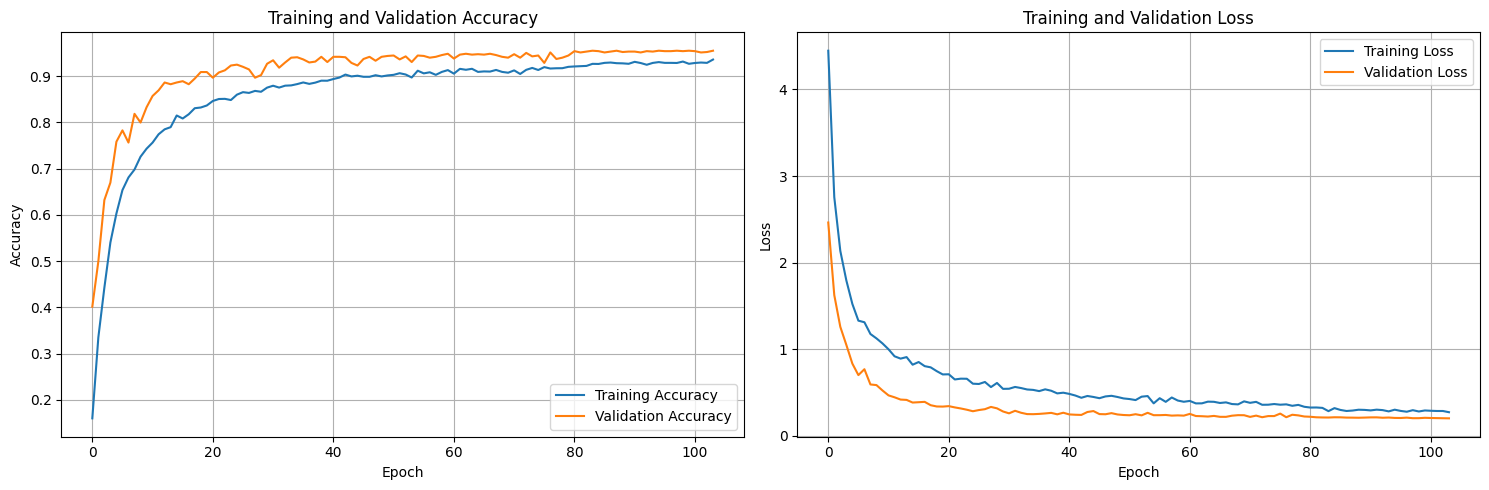

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()